# <center> Kaggle's Deep Learning in TensorFlow <center>

In this notebook there is a summary of the main concepts extracted from Kaggle's course on Deep Learning. Also, here we use datasets that are also used in that course.

## 1. Downloading data from Kaggle's datasets

Here's an example on how to upload some of Kaggle's datasets. First you will need to install Kaggle library in Python, you can achieve this by using the *pip install kaggle* command in your command line. For further instructions see this useful video: https://www.youtube.com/watch?v=DgGFhQmfxHo.

Then, you can view the following example on the *Red Win Quality* dataset example that consists of physiochemical measurements from about 1600 Portuguese red wines. Also included is a quality rating for each wine from blind taste-tests.

You can find this dataset in the following link: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [ ]:
!pip install kaggle

In [1]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

In [2]:
api = KaggleApi()
api.authenticate()

In [3]:
api.dataset_download_file('uciml/red-wine-quality-cortez-et-al-2009',
                             file_name = 'winequality-red.csv')

False

In [4]:
import pandas as pd

red_wine_df = pd.read_csv('winequality-red.csv')
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. Defining a simple linear model and looking at weights

In this dataset, we can see at the table below that we have 12 columns, of which we want to predict the quality with the other 11 features of the wine. In this case it's simple to see that there are 12 columns, but how can we look at this in larger datasets?

In [5]:
red_wine_df.shape

(1599, 12)

Now that we know what we want to achieve, lets create a simple linear model with 11 inputs (the features of the dataset) and wanting just one input (the wine's quality). Using Keras in TensorFlow, this would look like this:

In [7]:
!pip install tensorflow

In [8]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(units = 1, 
                                      input_shape = [11])])


Keras represents weights as tensors, but also uses tensors to represent data. When you set the `input_shape` argument, you are telling Keras the dimensions of the array it should expect for each example in the training data. Setting `input_shape=[3]` would create a network accepting vectors of length 3, like `[0.2, 0.4, 0.6]`.)

In [10]:
w, b = model.weights
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.24851382],
       [ 0.46029252],
       [-0.48545718],
       [ 0.4107558 ],
       [-0.3691285 ],
       [-0.27414787],
       [ 0.29743248],
       [ 0.5525052 ],
       [ 0.18919432],
       [-0.61726063],
       [ 0.47875232]], dtype=float32)>

Bias
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


## 3. Adding hidden layers to the model

You could think of each layer in a neural network as performing some kind of relatively simple transformation. Through a deep stack of layers, a neural network can transform its inputs in more and more complex ways. In a well-trained neural network, each layer is a transformation getting us a little bit closer to a solution.

Other important matter is the **activation function**. It turns out, however, that two dense layers with nothing in between are no better than a single dense layer by itself. Dense layers by themselves can never move us out of the world of lines and planes. What we need is something nonlinear. What we need are activation functions. An activation function is simply some function we apply to each of a layer's outputs (its activations).

The layers before the output layer are sometimes called **hidden layers** since we never see their outputs directly. By adding an activation function after the hidden layers, we gave the network the ability to learn more complex (non-linear) relationships in the data.


### 3.1 Building sequential models

The `Sequential model` we've been using will connect together a list of layers in order from first to last: the first layer gets the input, the last layer produces the output.

Let´s first import Kaggle's *Concrete dataset*.

In [ ]:
model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

In [16]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd

# Importing Kaggle's API for downloading the Concrete's dataser
api = KaggleApi()
api.authenticate()

In [25]:
api.dataset_download_file('elikplim/concrete-compressive-strength-data-set',
                          'concrete_data.csv')

True

In [27]:
# Reading the csv for viewing the data
concrete_df = pd.read_csv('concrete_data.csv')
concrete_df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [28]:
concrete_df.shape

(1030, 9)

The target for this task is the column `'CompressiveStrength'`. The remaining columns are the features we'll use as inputs.

Now we will create a model with three hidden layers, each having 512 units and the ReLU activation.  Be sure to include an output layer of one unit and no activation, and also `input_shape` as an argument to the first layer.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
            layers.Dense(units = 512, activation = 'relu', input_shape = [8]),
            layers.Dense(units = 512, activation = 'relu', input_shape = [512]),
            layers.Dense(units = 512, activation = 'relu', input_shape = [512]),
            layers.Dense(units = 1, input_shape = [512])
        ])

Sometimes though you'll want to put some other layer between the `Dense` layer and its activation function. (We'll see an example of this in Lesson 5 with *batch normalization*.) In this case, we can define the activation in its own `Activation` layer, like so:

```
layers.Dense(units=8),
layers.Activation('relu')
```

This is completely equivalent to the ordinary way: `layers.Dense(units=8, activation='relu')`.

We will rewrite the previous model so that each activation is in its own `Activation` layer., separate from the `Dense` layer.

In [29]:
model = keras.Sequential([
            layers.Dense(units = 512, input_shape = [8]),
            layers.Activation('relu'),
            layers.Dense(units = 512, input_shape = [512]),
            layers.Activation('relu'),
            layers.Dense(units = 512, input_shape = [512]),
            layers.Activation('relu'),
            layers.Dense(units = 1, input_shape = [512])
        ])

There is a whole family of variants of the `'relu'` activation -- `'elu'`, `'selu'`, and `'swish'`, among others -- all of which you can use in Keras. Sometimes one activation will perform better than another on a given task, so you could consider experimenting with activations as you develop a model. The ReLU activation tends to do well on most problems, so it's a good one to start with.

Let's look at the graphs of some of these. Change the activation from `'relu'` to one of the others named above. Then run the cell to see the graph. (Check out the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/activations) for more ideas.)

In [37]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn')

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

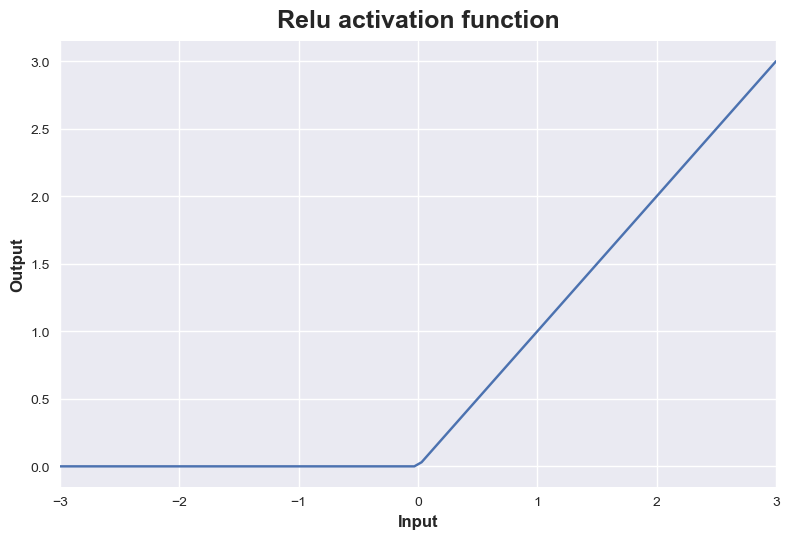

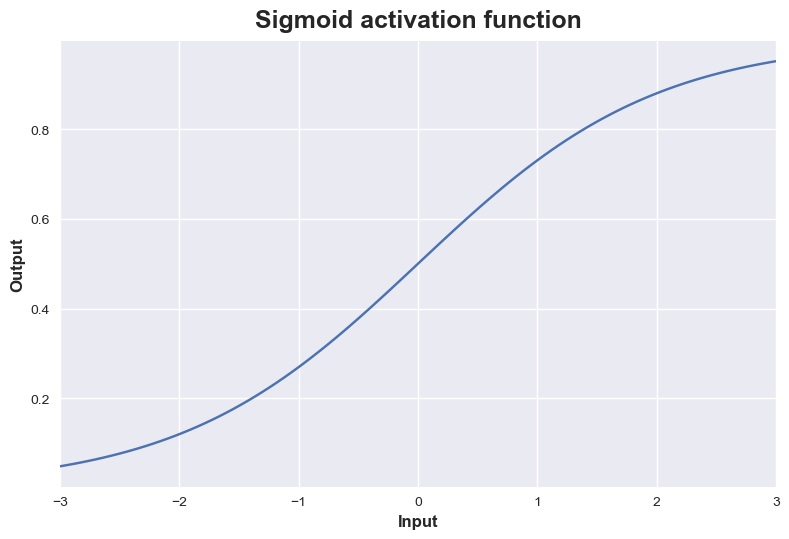

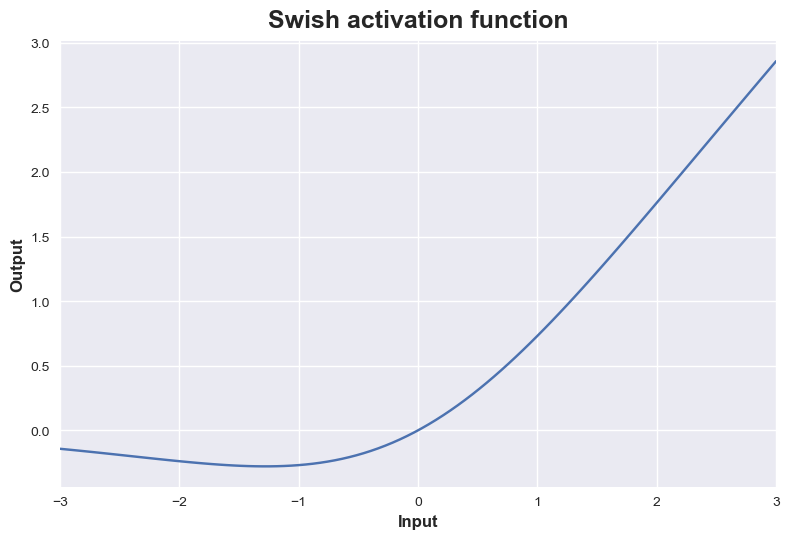

In [42]:
activation_functions = ['relu', 'sigmoid', 'swish']

# Representation of some activation functions
for function in activation_functions:
    activation_layer = layers.Activation(function)

    x = tf.linspace(-3.0, 3.0, 100)
    y = activation_layer(x)

    plt.figure(dpi=100)
    plt.plot(x, y)
    plt.xlim(-3, 3)
    plt.title(function.title() + ' activation function')
    plt.xlabel("Input")
    plt.ylabel("Output")
    
    
plt.show()

## 4. Loss function and optimizer

In this lesson we're going to see how to train a neural network; we're going to see how neural networks learn. As with all machine learning tasks, we begin with a set of training data. Each example in the training data consists of some features (the inputs) together with an expected target (the output). Training the network means adjusting its weights in such a way that it can transform the features into the target.

We generally need two things in order to train the neural network with data:
- A "loss function" that measures how good the network's predictions are.
- An "optimizer" that can tell the network how to change its weights.

### 4.1 The Loss function

The **loss function** measures the disparity between the the target's true value and the value the model predicts. A common loss function for regression problems is the **mean absolute error (MAE)**. For each prediction `y_pred`, MAE measures the disparity from the true target `y_true` by an absolute difference `abs(y_true - y_pred)`.

Besides MAE, other loss functions you might see for regression problems are the **mean squared error (MSE)** or the **Huber loss** (both available in Keras).

During training, the model will use the loss function as a guide for finding the correct values of its weights (lower loss is better). In other words, the loss function tells the network its objective.

### 4.2 The Optimizer - Stochastic Gradient Descent

We've described the problem we want the network to solve, but now we need to say how to solve it. This is the job of the **optimizer**. The optimizer is an algorithm that adjusts the weights to minimize the loss.

Virtually all of the optimization algorithms used in deep learning belong to a family called stochastic gradient descent. They are iterative algorithms that train a network in steps. One step of training goes like this:


1. Sample some training data and run it through the network to make predictions.
2. Measure the loss between the predictions and the true values.
3. Finally, adjust the weights in a direction that makes the loss smaller.

Each iteration's sample of training data is called a **minibatch** (or often just "**batch**"), while a complete round of the training data is called an **epoch**. The number of epochs you train for is how many times the network will see each training example.

### 4.3 Learning rate and batch size

These shifts are not made drastically, they are determined by a parameter called the **learning rate**. A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values.

The learning rate and the size of the minibatches are the two parameters that have the largest effect on how the SGD training proceeds. Their interaction is often subtle and the right choice for these parameters isn't always obvious.

Fortunately, for most work it won't be necessary to do an extensive hyperparameter search to get satisfactory results. **Adam optimizer** is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

### 4.4 Implementation in Keras

After defining a model, you can add a loss function and optimizer with the model's `compile` method:

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'mae'
)

The **gradient** is a vector that tells us in what direction the weights need to go. More precisely, it tells us how to change the weights to make the loss change fastest. We call our process gradient **descent** because it uses the gradient to descend the loss curve towards a minimum. **Stochastic** means "determined by chance." Our training is stochastic because the minibatches are random samples from the dataset. And that's why it's called SGD.

We are going to see an implementation with the *Red Wine dataset*.

First, we will import this file but we are alos doing some **normalization** on the data. This means that to make the optimizer work better we should make each feature to lie in the interval [0,1]; so no feature has certain "advantage" learning in comparison to the others.

In [1]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

In [2]:
api = KaggleApi()
api.authenticate()

In [3]:
api.dataset_download_file('uciml/red-wine-quality-cortez-et-al-2009',
                             file_name = 'winequality-red.csv')

False

In [7]:
import pandas as pd

rw_df = pd.read_csv('winequality-red.csv')
rw_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# First, we should split the data into training and validation sets

rw_df_train = rw_df.sample(frac = 0.8, random_state = 0)
rw_df_val = rw_df.drop(rw_df_train.index)

rw_df_val.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
23,8.5,0.49,0.11,2.3,0.084,9.0,67.0,0.9968,3.17,0.53,9.4,5
24,6.9,0.40,0.14,2.4,0.085,21.0,40.0,0.9968,3.43,0.63,9.7,6
25,6.3,0.39,0.16,1.4,0.080,11.0,23.0,0.9955,3.34,0.56,9.3,5
28,7.1,0.71,0.00,1.9,0.080,14.0,35.0,0.9972,3.47,0.55,9.4,5


In [27]:
# For the normalization of the data we look for the max and min of each col

rw_max = rw_df.max(axis = 0)
rw_min = rw_df.min(axis = 0)

print('\033[1m', "Maximum:", '\033[0m',  rw_max, sep = '\n')
print()
print('\033[1m', "Minimum:", '\033[0m', rw_min, sep = '\n')


Maximum:

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64


Minimum:

fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
dtype: float64


In [29]:
# And now the normalization

rw_df_train = (rw_df_train - rw_min) / (rw_max - rw_min)
rw_df_val = (rw_df_val - rw_min) / (rw_max - rw_min)

rw_df_val.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
11,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077,0.4
23,0.345133,0.253425,0.11,0.095890,0.120200,0.112676,0.215548,0.494126,0.338583,0.119760,0.153846,0.4
24,0.203540,0.191781,0.14,0.102740,0.121870,0.281690,0.120141,0.494126,0.543307,0.179641,0.200000,0.6
25,0.150442,0.184932,0.16,0.034247,0.113523,0.140845,0.060071,0.398678,0.472441,0.137725,0.138462,0.4
28,0.221239,0.404110,0.00,0.068493,0.113523,0.183099,0.102473,0.523495,0.574803,0.131737,0.153846,0.4


In [32]:
# Now splitting the features and target:

X_train = rw_df_train.drop('quality', axis = 1)
X_val = rw_df_val.drop('quality', axis = 1)

Y_train = rw_df_train['quality']
Y_val = rw_df_val['quality']

X_train.shape

(1279, 11)

And let's do for example a three-layer neural network with 512 units in each layer with a `relu` activation function.

In [37]:
# Importing libraries
from tensorflow import keras
from tensorflow.keras import layers


# Defining the model
model = keras.Sequential([
            layers.Dense(512, activation = 'relu', input_shape = [11]),
            layers.Dense(512, activation = 'relu', input_shape = [512]),
            layers.Dense(512, activation = 'relu', input_shape = [512]),
            layers.Dense(1, input_shape = [512])
])


# Compiling optimizer and loss function
model.compile(
    optimizer = 'adam',
    loss = 'mae'
)

Now we're ready to start the training. We are telling Keras to feed the optimizer 256 rows of the training data at a time (the `batch_size`) and to do that 10 times all the way through the dataset (the `epochs`)

In [38]:
history = model.fit(
            X_train, Y_train,
            validation_data = (X_val, Y_val),
            batch_size = 256,
            epochs = 10
)

Epoch 1/10
5/5 [==============================] - 1s 106ms/step - loss: 0.3480 - val_loss: 0.1408
Epoch 2/10
5/5 [==============================] - 0s 73ms/step - loss: 0.1451 - val_loss: 0.1294
Epoch 3/10
5/5 [==============================] - 0s 77ms/step - loss: 0.1294 - val_loss: 0.1183
Epoch 4/10
5/5 [==============================] - 0s 54ms/step - loss: 0.1212 - val_loss: 0.1132
Epoch 5/10
5/5 [==============================] - 0s 76ms/step - loss: 0.1122 - val_loss: 0.1005
Epoch 6/10
5/5 [==============================] - 0s 70ms/step - loss: 0.1083 - val_loss: 0.1032
Epoch 7/10
5/5 [==============================] - 0s 82ms/step - loss: 0.1076 - val_loss: 0.0985
Epoch 8/10
5/5 [==============================] - 0s 75ms/step - loss: 0.1038 - val_loss: 0.0971
Epoch 9/10
5/5 [==============================] - 0s 73ms/step - loss: 0.1052 - val_loss: 0.1026
Epoch 10/10
5/5 [==============================] - 0s 69ms/step - loss: 0.1013 - val_loss: 0.0965


In [44]:
# Converting the training history to a dataframe
history_df = pd.DataFrame(history.history)

history_df.head()

,loss,val_loss
0,0.280992,0.140846
1,0.149309,0.129446
2,0.131921,0.118256
3,0.120423,0.113157
4,0.113893,0.100481


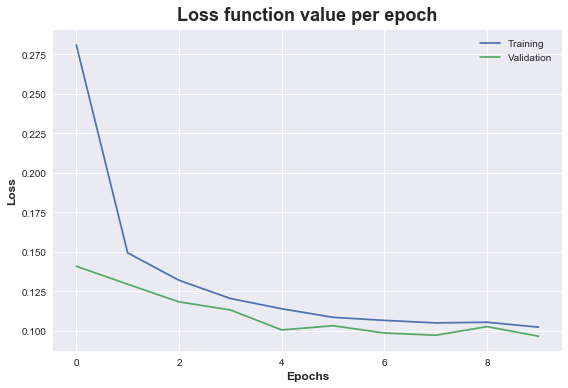

In [54]:
import matplotlib.pyplot as plt

epochs = list(range(10))

# Setting default MatPlotLib values
plt.style.use('seaborn')
plt.rc('figure', autolayout = True)
plt.rc('axes', labelweight = 'bold', labelsize = 'large',
       titleweight = 'bold', titlesize = 18, titlepad = 10)

# Setting the plots
plt.plot(epochs, history_df['loss'], label = 'Training')
plt.plot(epochs, history_df['val_loss'], label = 'Validation')

# Last details on the chart
plt.title('Loss function value per epoch')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = 1)

### 4.5 Kaggle's exercise

In this exercise you'll train a neural network on the *Fuel Economy* dataset and then explore the effect of the learning rate and batch size on SGD.

In [17]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In the *Fuel Economy* dataset your task is to predict the fuel economy of an automobile given features like its type of engine or the year it was made. 

In [18]:
import pandas as pd

fuel_df = pd.read_csv('fuel.csv') #, encoding = "windows-1252"
fuel_df.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


First, let's define the network we'll use for this task:

In [19]:
fuel_df.shape

(1107, 14)

In [31]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation = 'relu', input_shape = [50]),
    layers.Dense(128, activation = 'relu'),    
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1),
])

In [32]:
model.compile(
    optimizer = "adam",
    loss = 'mae'
)

For *preprocessing* our data and splitting into X and Y, we will use the following code:

In [33]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

X = fuel_df.copy()

# Remove the target (Y value)
Y = X.pop('FE')

X.head()

,EngDispl,NumCyl,Transmission,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [34]:
Y.head()

0    28.0198
1    25.6094
2    26.8000
3    25.0451
4    24.8000
Name: FE, dtype: float64

Until now we only splitted the data into X and Y. Now we will continue with the preprocessing.

In [35]:
preprocessor = make_column_transformer(
    (StandardScaler(), # The values are re-scaled to (x-mean)/std dev
     make_column_selector(dtype_include = np.number)),
    (OneHotEncoder(sparse = False),
     make_column_selector(dtype_include = object)),
)

X = preprocessor.fit_transform(X)
Y = np.log(Y) # log transform target instead of standardizing

X.shape

(1107, 50)

Once you've defined the model and compiled it with a loss and optimizer you're ready for training. Train the network for 200 epochs with a batch size of 128. The input data is `X` with target `Y`.

In [36]:
history = model.fit(
            X, Y,
            batch_size = 128,
            epochs = 200
)

Epoch 1/200
9/9 [==============================] - 0s 2ms/step - loss: 3.0090
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 0.9101
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5738
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3678
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2276
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1825
Epoch 7/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1354
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1193
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0973
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0887
Epoch 11/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0813
Epoch 12/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0747
Epoch 13/200
9/9 [==============================] - 0s 2ms/st

9/9 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 105/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0340
Epoch 106/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0304
Epoch 107/200
9/9 [==============================] - ETA: 0s - loss: 0.030 - 0s 2ms/step - loss: 0.0317
Epoch 108/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0312
Epoch 109/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 110/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 111/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 112/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0331
Epoch 113/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0395
Epoch 114/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0393
Epoch 115/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0361
Epoch 116/200
9/9 [===========

The last step is to look at the loss curves and evaluate the training. Run the cell below to get a plot of the `training loss`.

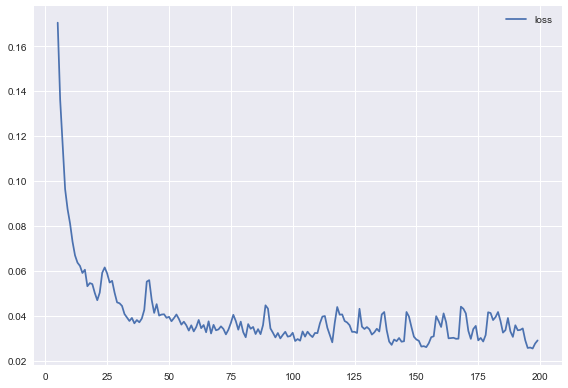

In [37]:
history_df = pd.DataFrame(history.history)

# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

**Training evaluation:** If you trained the model longer, would you expect the loss to decrease further?

This depends on how the loss has evolved during training: if the learning curves have levelled off, there won't usually be any advantage to training for additional epochs. Conversely, if the loss appears to still be decreasing, then training for longer could be advantageous.

With the learning rate and the batch size, you have some control over:
- How long it takes to train a model
- How noisy the learning curves are
- How small the loss becomes

To get a better understanding of these two parameters, we'll look at the linear model, our ppsimplest neural network. Having only a single weight and a bias, it's easier to see what effect a change of parameter has.

The next cell will generate an animation like the one in the tutorial. Change the values for `learning_rate`, `batch_size`, and `num_examples` (how many data points) and then run the cell. (It may take a moment or two.) Try the following combinations, or try some of your own:

| `learning_rate` | `batch_size` | `num_examples` |
|-----------------|--------------|----------------|
| 0.05            | 32           | 256            |
| 0.05            | 2            | 256            |
| 0.05            | 128          | 256            |
| 0.02            | 32           | 256            |
| 0.2             | 32           | 256            |
| 1.0             | 32           | 256            |
| 0.9             | 4096         | 8192           |
| 0.99            | 4096         | 8192           |

**Learning Rate and Batch Size:** What effect did changing these parameters have?

You probably saw that smaller batch sizes gave noisier weight updates and loss curves. This is because each batch is a small sample of data and smaller samples tend to give noisier estimates. Smaller batches can have an "averaging" effect though which can be beneficial.

Smaller learning rates make the updates smaller and the training takes longer to converge. Large learning rates can speed up training, but don't "settle in" to a minimum as well. When the learning rate is too large, the training can fail completely. (Try setting the learning rate to a large value like 0.99 to see this.)